# Pymaceuticals Inc.
---

### Background

- As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
  
### Findings

- The count of mice by gender showed 124 females and 125 males, indicating an almost equal distribution. Mice treated with Capomulin demonstrated the highest survival rate compared to the other eight treatment regimens. Capomulin had the second lowest tumor volume median after Ramicane. Ramicane showed the highest efficacy in tumor volume reduction over the study period, with all twenty-five mice treated showing a reduction in tumor volume. The correlation between mouse weight and average tumor volume was found to be 0.84, indicating a strong positive correlation. This suggests that as mouse weight increases, the average tumor volume also increases.

### Analysis

- The analysis of the data reveals several critical insights regarding the efficacy of different treatment regimens on tumor volume and survival rates in mice. The Capomulin regimen demonstrated a significant impact on tumor reduction and survival rates, with a high number of mice and strong performance second only to Ramicane. The strong positive correlation (0.84) between mouse weight and average tumor volume highlights the importance of considering body weight in evaluating treatment efficacy.

- The regression analysis provided a robust model (R-squared value of 0.71) to predict average tumor volume based on mouse weight, emphasizing the model's effectiveness in explaining the variability in tumor volume. Additionally, the gender analysis indicated that the treatments were equally effective across male and female mice, reinforcing the consistency of the study's findings across different demographics.

- The comparison between Capomulin and Ramicane showed that while Capomulin was highly effective, Ramicane had a slightly better outcome in terms of tumor volume reduction. This suggests that further studies are necessary to explore the long-term effectiveness and potential combination therapies involving these regimens.

- Overall, the findings underscore the efficacy of Capomulin and Ramicane in reducing tumor volume, with Capomulin showing strong potential as a viable treatment option. The study's comprehensive analysis of treatment effects, correlation with body weight, and gender-based responses provides valuable insights for future research and clinical applications. Further investigation is recommended to confirm these findings and optimize treatment strategies for improved outcomes.

### Mouse Metadata and Study Results Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

### Mouse Metadata

In [2]:
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


### Study Results 

In [3]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


# Preparing The Data
### Combining both datasets into a single dataset

In [4]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Rename Age_months column
combined_df = combined_df.rename(columns={'Age_months':'Age(months)'})

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age(months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [5]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df['Mouse ID'] == 'g989',:]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age(months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mice)]
# Rename Age_months column
combined_df = cleaned_df.rename(columns={'Age_months':'Age(months)'})
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age(months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [9]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice = cleaned_df['Mouse ID'].nunique()
cleaned_mice

248

## Summary Statistics for Tumor Volume

### Includes:
- A row for each drug regimen. These regimen names should be contained in the index column.
- A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Create groupby for each drug regimen
group_by_drug=cleaned_df.groupby(['Drug Regimen']) 

# mean volume
vol_mean = group_by_drug['Tumor Volume (mm3)'].mean()

# median volume
vol_median = group_by_drug['Tumor Volume (mm3)'].median()

# variance volume
vol_variance = group_by_drug['Tumor Volume (mm3)'].var()

# standard deviation volume
vol_standard_deviation = group_by_drug['Tumor Volume (mm3)'].std()

# sem volume
vol_SEM = group_by_drug['Tumor Volume (mm3)'].sem()

# summary stats data frame for change in tumor volume by each drung regimen
summary_stats = pd.DataFrame({
    'Mean Tumor Vol.':vol_mean,
    'Median Tumor Vol.':vol_median,
    'Tumor Vol. Variance':vol_variance,
    'Tumor Vol. Std. Dev.':vol_standard_deviation,
    'Tumor Vol. Std. Err.':vol_SEM
})

# Assemble the resulting series into a single summary DataFrame.
summary_stats

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Std. Dev.,Tumor Vol. Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stat_egg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stat_egg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Charts

- Create two bar charts that show the total number of rows for each drug regimen throughout the study.
- NOTE: These plots should look identical.


In [12]:
# Create a series with the number of mice that recieved a drug regimen and count each data point.
mice_number = cleaned_df['Drug Regimen'].value_counts()
mice_number

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

### Pandas Bar Plot

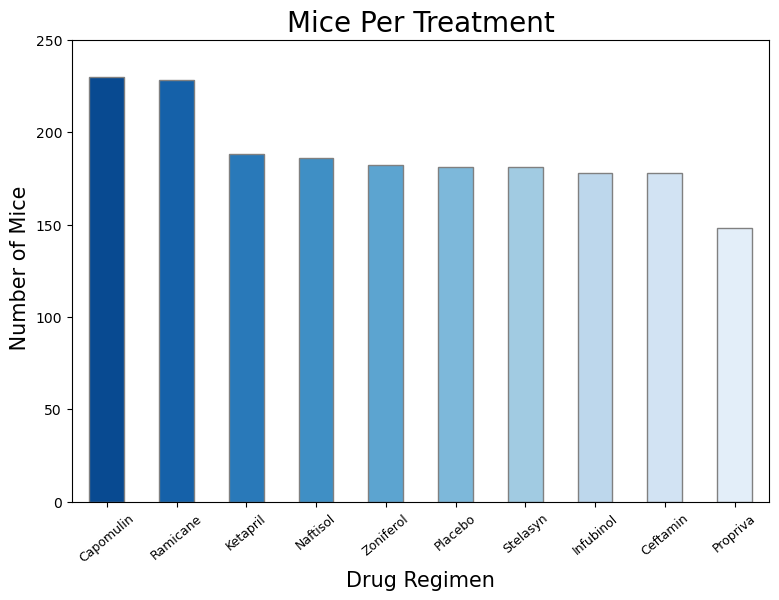

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
colors = plt.cm.Blues(np.linspace(0.9, 0.1, len(mice_number)))
pandas_plot = mice_number.plot(kind='bar', figsize=(9, 6), color=colors[:len(mice_number)], alpha=1, edgecolor='gray', align='center')

# Set plot labels and title
plt.xlabel('Drug Regimen', fontsize=15, color='black')
plt.ylabel(' Number of Mice', fontsize=15, color='black')
plt.xticks(rotation=40, fontsize=9)
plt.title('Mice Per Treatment', fontsize=20, color='black')

#set y limits
plt.ylim(0, 250)

# Display bar chart
plt.show()


### PyPlot Bar Plot

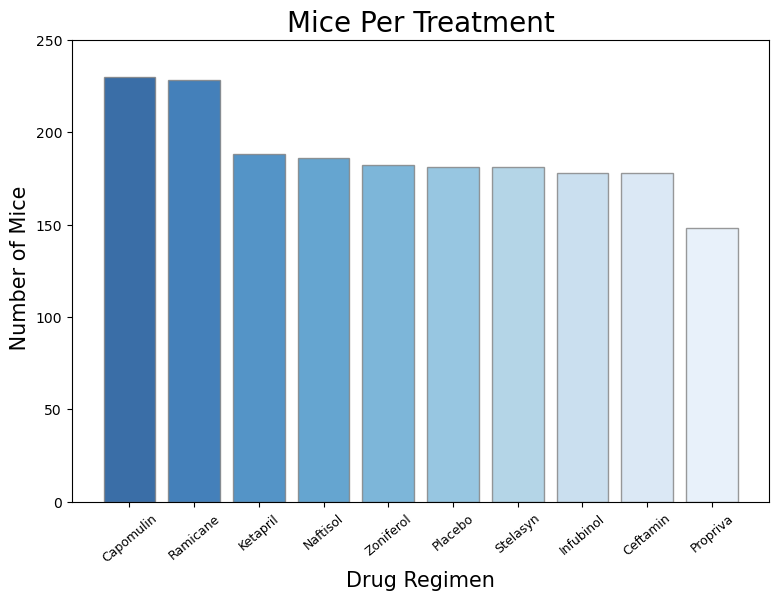

In [14]:
# Generate colors from dark blue to light blue
colors = plt.cm.Blues(np.linspace(0.9, 0.1, len(mice_number)))

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_number.index.values
y_axis = mice_number.values
plt.figure(figsize=(9,6))
plt.bar(x_axis, y_axis, color=colors, alpha=0.8, edgecolor='gray', align='center')
plt.xlabel('Drug Regimen', fontsize=15, color='black')
plt.ylabel(' Number of Mice', fontsize=15, color='black')
plt.xticks(rotation=40, fontsize=9)
plt.title('Mice Per Treatment', fontsize=20, color='black')

#set y limits
plt.ylim(0, 250)

# Display bar chart
plt.show()

# Distribution Between Male and Female Mice

## Pie Charts

- Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.
- NOTE: These plots should look identical.

### Generate Male and Female Count

In [15]:
# Pull Total Mice count from cleaned_mice
mice_total=cleaned_df['Mouse ID'].nunique()

# Pull count of male mice
male_mice=cleaned_df.loc[cleaned_df['Sex']=='Male',:].nunique().iloc[0]
# Calculate percentage of male mice
male_percentage=(male_mice/mice_total)*100

# Pull count of female mice
female_mice=cleaned_df.loc[cleaned_df['Sex']=='Female',:].nunique().iloc[0]
# Calculate percentage of male mice
female_percentage=(female_mice/mice_total)*100

# Generate DataFrame for the distribution of male and female mice
male_and_female_df = pd.DataFrame({'Distribution': [male_percentage, female_percentage]}, index=['Male','Female'])


### Pandas Pie Chart

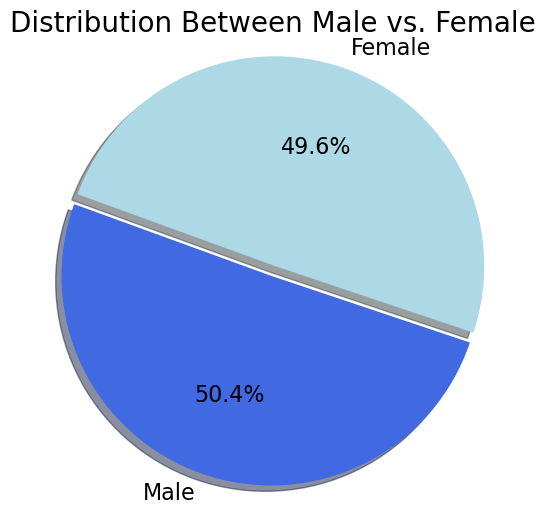

In [16]:
# Set pie chart aesthetics
colors=['royalblue', 'lightblue']
explode=(0, 0.05)

# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = male_and_female_df.plot(kind="pie", y='Distribution', figsize=(6,6), colors=colors,
                                  startangle=160, explode=explode, shadow=True, fontsize=16,
                                  autopct="%1.1f%%")
# Set labels
pandas_pie.set_title('Distribution Between Male vs. Female', fontsize=20)
pandas_pie.set_ylabel('')
plt.axis('equal')
plt.legend('',frameon=False)

# Plot pie chart
plt.show()

### PyPlot Pie Chart

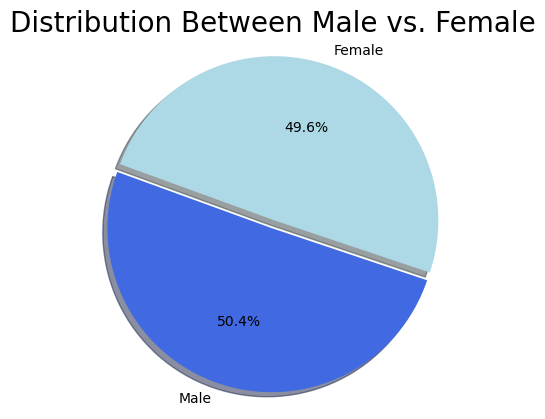

In [17]:
# Set pie chart aesthetics
colors=['royalblue', 'lightblue']
explode=(0, 0.05)
dis_data=male_and_female_df['Distribution']
pyplot_pie=plt.pie(dis_data, colors=colors, explode=explode, shadow=True, startangle=160,
              labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title('Distribution Between Male vs. Female', fontsize=20)
plt.axis('equal')

# Set figure size and font size parameters
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size']=(16)

# Plot pie chart
plt.show()

## Quartiles, Outliers and Boxplots

1. Calculate the final tumor volume of each mouse across four of the most promising treatement regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Then, calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens.
2. Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_group=cleaned_df[cleaned_df['Drug Regimen'].isin(treatment_list)]
treatment_group.head()

,Mouse ID,Drug Regimen,Sex,Age(months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint=treatment_group.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max().reset_index()
greatest_timepoint

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
95,Ramicane,s508,45
96,Ramicane,u196,45
97,Ramicane,w678,5
98,Ramicane,y449,15


In [33]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume=pd.DataFrame(greatest_timepoint)
tumor_volume= pd.merge(tumor_volume, cleaned_df, on=['Drug Regimen', 'Mouse ID','Timepoint'], how='left')

#Display
tumor_volume

,Drug Regimen,Mouse ID,Timepoint,Sex,Age(months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,30.276232,0
96,Ramicane,u196,45,Male,18,25,40.667713,3
97,Ramicane,w678,5,Female,5,24,43.166373,0
98,Ramicane,y449,15,Male,19,24,44.183451,0


In [34]:
# Filter through tumor_volume DataFrame to include only the treatment regimens in the treatment group
tumor_vol_filtered= tumor_volume[tumor_volume['Drug Regimen'].isin(treatment_group)]
tumor_vol_filtered

,Drug Regimen,Mouse ID,Timepoint,Sex,Age(months),Weight (g),Tumor Volume (mm3),Metastatic Sites


In [38]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatment_list:
    tumor_volume_df = tumor_volume.loc[tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume_df)

    
    # tumor_volume_df = tumor_vol_filtered.loc[tumor_vol_filtered["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    # tumor_volume_data.append(tumor_volume_df)

# Calculate IQR for each treatment group and print results
for treatment in treatment_list:
    quartiles = tumor_volume.loc[tumor_volume['Drug Regimen'] == treatment]["Tumor Volume (mm3)"].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"------------------------------------------------------------")
    print(f"The lower quartile of {treatment} treatments is: {round(lowerq, 2)}")
    print(f"The upper quartile of {treatment} treatments is: {round(upperq, 2)}")
    print(f"The interquartile range of {treatment} treatments is: {round(iqr, 2)}")
    print(f"Values below {round(lower_bound, 2)} could be {treatment} outliers.")
    print(f"Values above {round(upper_bound, 2)} could be {treatment} outliers.")
    print(f"------------------------------------------------------------")


------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 

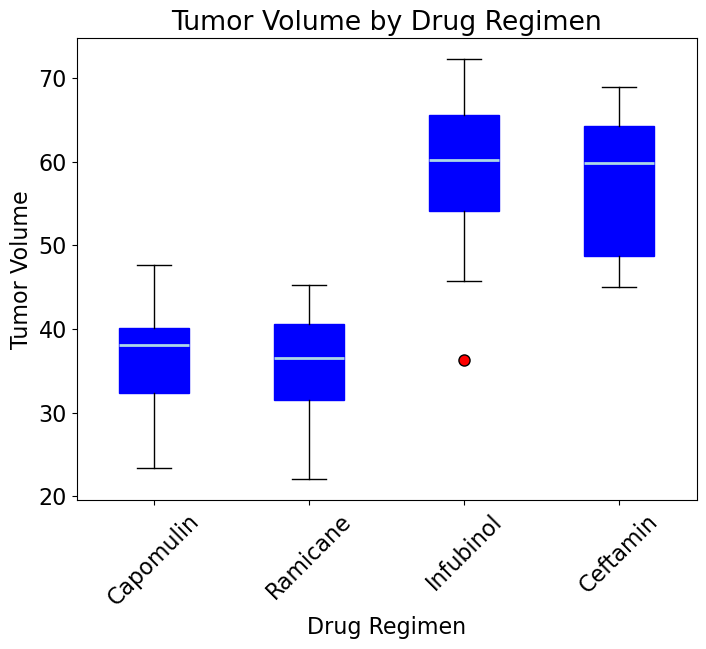

In [45]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot_list = []
for treatment in treatment_list:
    tumor_volumes = tumor_volume.loc[tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    boxplot_list.append(tumor_volumes.dropna().tolist())

# Adjust figure size
fig = plt.figure(figsize=(8, 6)) 
# Make box plots blue
boxprops = dict(facecolor='blue', color='blue')
# Add light blue for interquartile line
medianprops = dict(color='lightblue', linewidth=2)
# Make outlier a red filled dot
flierprops = dict(marker='o', color='red', markerfacecolor='red', markersize=8)
# Create box plot
boxplot = plt.boxplot(boxplot_list, patch_artist=True, labels=treatment_list,
                      boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)

# Add labels and titles
plt.xlabel("Drug Regimen")
plt.xticks([1,2,3,4], treatment_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.xticks(rotation=45)

# Show plot
plt.show()


## Line and Scatter Plots

- Select a single mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse.- 
Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

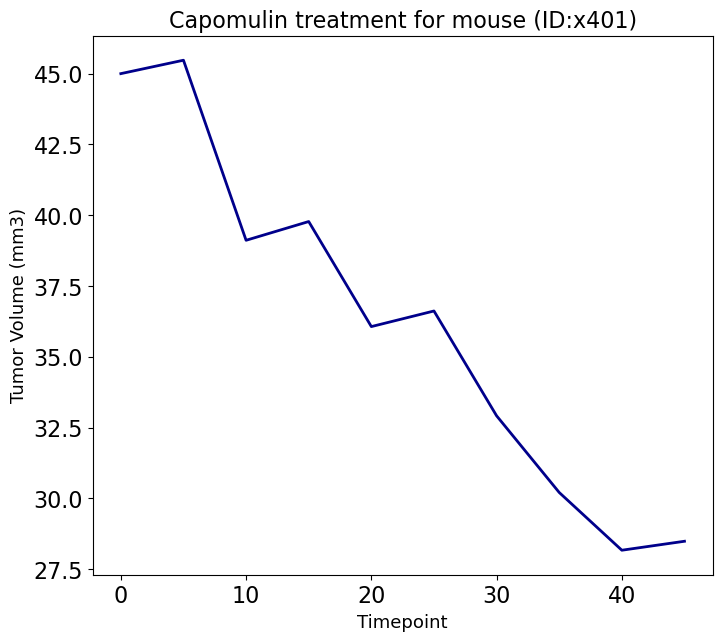

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = cleaned_df.loc[cleaned_df['Mouse ID'] == 'x401',:]
line_plot_df

time = line_plot_df['Timepoint']
volume = line_plot_df['Tumor Volume (mm3)'] 

#print(random_mouse["Mouse ID"])
plt.figure(figsize=(8,7))
line, = plt.plot(time, volume, color='darkblue', linewidth=2, markersize=6)
plt.xlabel('Timepoint', fontsize=13, color='black')
plt.ylabel('Tumor Volume (mm3)', fontsize=13, color='black')
plt.title('Capomulin treatment for mouse (ID:x401)', fontsize=16, color='black')

plt.show()

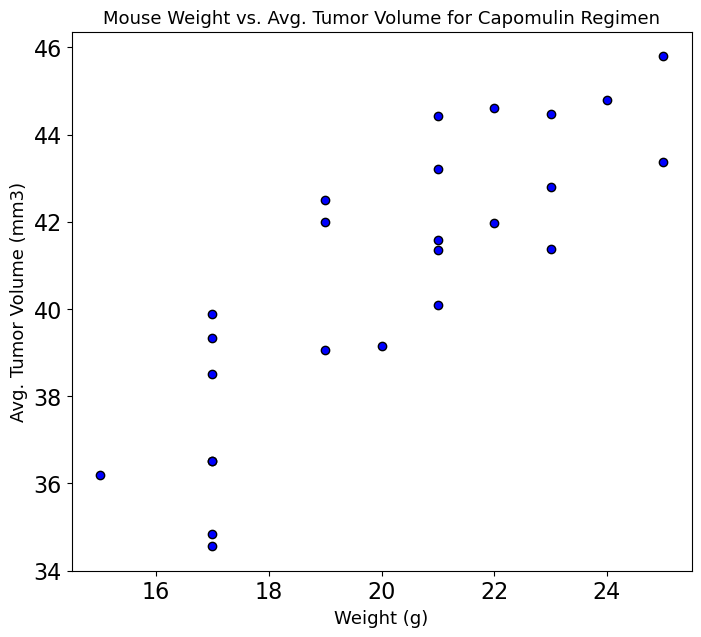

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

# Get the mouse weight for each mouse
mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(8, 7))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], color='blue', edgecolor='black')
plt.xlabel('Weight (g)', fontsize=13, color='black')
plt.ylabel('Avg. Tumor Volume (mm3)', fontsize=13, color='black')
plt.title('Mouse Weight vs. Avg. Tumor Volume for Capomulin Regimen', fontsize=13, color='black')

# Show the plot
plt.show()

## Correlation and Regression

- Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen.- 
Plot the linear regression model on top of the previous scatter plot.

Correlation coefficient: 0.84
Slope: 0.95, Intercept: 21.55
R-squared: 0.71


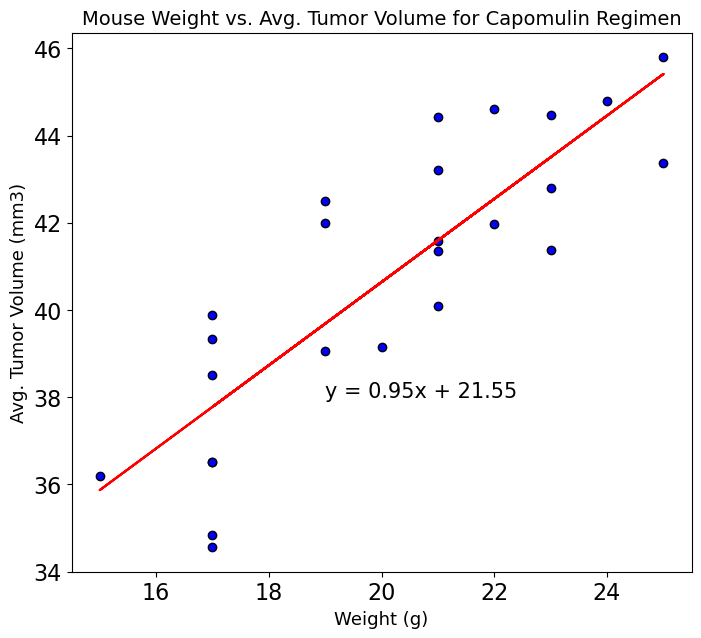

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

# Get the mouse weight for each mouse
mouse_weight = capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, mouse_weight, on='Mouse ID')

# Calculate the correlation coefficient
correlation = np.corrcoef(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])[0, 1]
print(f"Correlation coefficient: {correlation:.2f}")

# Perform linear regression
x_values=merged_data['Weight (g)']
y_values=merged_data['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_values = x_values * slope + intercept
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'])
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

# Generate the scatter plot with the regression line
plt.figure(figsize=(8, 7))
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume (mm3)'], color='blue', edgecolor='black')
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], 'r', label=f'Linear fit (R²={r_value**2:.2f})')
plt.plot(x_values,regression_values,"r-")
equation_line = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.annotate(equation_line,(19, 38),fontsize=15,color='black')
plt.xlabel('Weight (g)', fontsize=13, color='black')
plt.ylabel('Avg. Tumor Volume (mm3)', fontsize=13, color='black')
plt.title('Mouse Weight vs. Avg. Tumor Volume for Capomulin Regimen', fontsize=14, color='black')


# Show the plot
plt.show()